# Exploratory Data Analysis (EDA)
Conduct EDA on the pollution aqi of Northeastern counties and their socio-economic features to examine relationships between variables and other patterns in the data

Cleane Data is used from data_wrangling11

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')


## Load data

In [2]:
path = r'../../data/processed/alt_full_dem_df_2017_2019'
df_2017_2019 = pd.read_csv(path)

path = r'../../data/processed/alt_full_dem_df_2017'
df_2017 = pd.read_csv(path)
path = r'../../data/processed/alt_full_dem_df_2018'
df_2018 = pd.read_csv(path)
path = r'../../data/processed/alt_full_dem_df_2019'
df_2019 = pd.read_csv(path)

In [3]:
# df_2017.columns.tolist()


['GeoFIPS',
 'State Name',
 'county Name',
 'AQI_2017',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Poverty Estimate, All Ages_2017',
 '90% CI LB All Ages_2017',
 '90% CI UB All Ages_2017',
 'Poverty Percent, All Ages_2017',
 '90% CI LB percent_2017',
 '90% CI UB percent_2017',
 'Poverty Estimate, Age 0-17_2017',
 '90% CI LB percent 0-17_2017',
 '90% CI UB 0-17_2017',
 'Poverty Percent, Age 0-17_2017',
 '90% CI LB percent 0-17 percent_2017',
 '90% CI UB 0-17 percent_2017',
 'Poverty Estimate, Age 5-17 in Families_2017',
 '90% CI LB 5-17 fam_2017',
 '90% CI UB 5-17 fam_2017',
 'Poverty Percent, Age 5-17 in Families_2017',
 '90% CI LB 5-17 percent_2017',
 '90% CI UB percent 5-17 percent_2017',
 'Median Household Income_2017',
 '90% CI Lower Bound LB medh inc_2017',
 '90% CI UB medh inc_2017',
 'POP_2017',
 'EDU_TOT_2017',
 'LESS_HS_TOT_2017',
 'HS_TOT_2017',
 'COL_OR_ASSOC_TOT_2017',
 'BACH_TOT_2017',
 'GRAD_TOT_2017',
 'VEHICLE_TOT_20

In [4]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNAC_FEMALE_ratio_2017     0.190756
HNA_FEMALE_ratio_2017      0.191780
Unemployed_2017            0.196824
TOT_FEMALE_ratio_2017      0.202237
VEHICLE_TOT_2017           0.209205
HS_TOT_2017                0.211536
NHBA_MALE_ratio_2017       0.262107
BA_MALE_ratio_2017         0.264864
NHBAC_MALE_ratio_2017      0.265391
BAC_MALE_ratio_2017        0.269597
NHBA_FEMALE_ratio_2017     0.279015
BA_FEMALE_ratio_2017       0.280889
NHBAC_FEMALE_ratio_2017    0.282360
BAC_FEMALE_ratio_2017      0.285069
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

COL_OR_ASSOC_TOT_2018      0.288882
NHBA_MALE_ratio_2018       0.291288
NHBAC_MALE_ratio_2018      0.292866
HNAC_FEMALE_ratio_2018     0.295672
Unemployed_2018            0.298367
HNA_FEMALE_ratio_2018      0.299640
TOT_FEMALE_ratio_2018      0.303310
BA_MALE_ratio_2018         0.306014
BAC_MALE_ratio_2018        0.311454
NHBA_FEMALE_ratio_2018     0.325695
NHBAC_FEMALE_ratio_2018    0.327626
VEHICLE_TOT_2018           0.331917
BA_FEMALE_ratio_2018       0.337740
BAC_FEMALE_ratio_2018      0.342563
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

Unemployed_2019            0.255524
HS_TOT_2019                0.257668
NHBA_MALE_ratio_2019       0.258102
NHBAC_MALE_ratio_2019      0.259097
HNAC_FEMALE_ratio_2019     0.259517
BA_MALE_ratio_2019         0.269263
BAC_MALE_ratio_2019        0.273125
HNA_FEMALE_ratio_2019      0.275369
TOT_FEMALE_ratio_2019      0.292989
NHBA_FEMALE_ratio_2019     0.299474
NHBAC_FEMALE_ratio_2019    0.300548
VEHICLE_TOT_2019           0.306044
BA_FEMALE_ratio_2019       0.306999
BAC_FEMALE_ratio_2019      0.310091
AQI_2019                   1.000000
Name: AQI_2019, dtype: float64

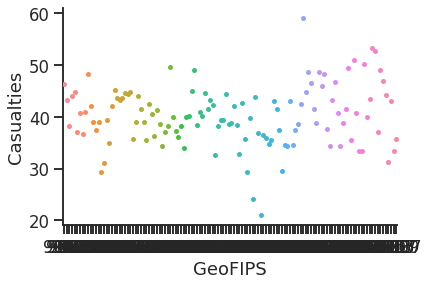

<AxesSubplot:xlabel='GeoFIPS', ylabel='AQI_2017'>

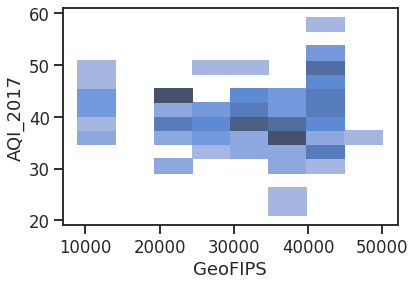

In [5]:
df_2017
sns.swarmplot(data=df_2017, x='GeoFIPS', y='AQI_2017')
plt.xlabel('GeoFIPS')
plt.ylabel('Casualties')
sns.despine()
plt.show()

# look at correlations again
# then look at the top aqi average counties
# then look at their data individually


sns.histplot(data=df_2017, x='GeoFIPS', y='AQI_2017')

In [18]:

NORTH_EAST = ['Massachusetts', 'Connecticut', 'Maine', 'New York', 'Pennsylvania', 'Vermont', 'Delaware', 'Maryland', 'Rhode Island', 'District of Columbia']
fips = df_2017['GeoFIPS'].tolist()
values = df_2017['AQI_2017'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, scope=NORTH_EAST, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    legend_title='AQI per county')

fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)

fig.layout.template = None
fig.show()

In [16]:
df_2017['State Name'].unique()


array(['Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts',
       'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania',
       'Rhode Island', 'Vermont'], dtype=object)

In [20]:
values = df_2017['BAC_FEMALE_ratio_2017'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, scope=NORTH_EAST, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    legend_title='BAC_FEMALE_ratio_2017 per county')

fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)

fig.layout.template = None
fig.show()

In [21]:
values = df_2017['Unemployed_2017'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, scope=NORTH_EAST, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    legend_title='Unemployed_2017 per county')

fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)

fig.layout.template = None
fig.show()

In [54]:
l1 = df_2017.columns.tolist()
l2 = df_2018.columns.tolist()
l3 = df_2019.columns.tolist()
count = 0
for item, item2 in zip(l1, l2):
    if(item[0] != item2[0]):
        print(count, item, item2)
    count+=1

46 TOT_FEMALE_2017 WA_MALE_2018
48 WA_FEMALE_2017 BA_MALE_2018
50 BA_FEMALE_2017 IA_MALE_2018
52 IA_FEMALE_2017 AA_MALE_2018
54 AA_FEMALE_2017 NA_MALE_2018
56 NA_FEMALE_2017 TOM_MALE_2018
58 TOM_FEMALE_2017 WAC_MALE_2018
60 WAC_FEMALE_2017 BAC_MALE_2018
62 BAC_FEMALE_2017 IAC_MALE_2018
64 IAC_FEMALE_2017 AAC_MALE_2018
66 AAC_FEMALE_2017 NAC_MALE_2018
92 NHNAC_FEMALE_2017 H_MALE_2018
116 HNAC_FEMALE_2017 TOT_MALE_ratio_2018
118 TOT_FEMALE_ratio_2017 WA_MALE_ratio_2018
120 WA_FEMALE_ratio_2017 BA_MALE_ratio_2018
122 BA_FEMALE_ratio_2017 IA_MALE_ratio_2018
124 IA_FEMALE_ratio_2017 AA_MALE_ratio_2018
126 AA_FEMALE_ratio_2017 NA_MALE_ratio_2018
128 NA_FEMALE_ratio_2017 TOM_MALE_ratio_2018
130 TOM_FEMALE_ratio_2017 WAC_MALE_ratio_2018
132 WAC_FEMALE_ratio_2017 BAC_MALE_ratio_2018
134 BAC_FEMALE_ratio_2017 IAC_MALE_ratio_2018
136 IAC_FEMALE_ratio_2017 AAC_MALE_ratio_2018
138 AAC_FEMALE_ratio_2017 NAC_MALE_ratio_2018
164 NHNAC_FEMALE_ratio_2017 H_MALE_ratio_2018


In [61]:
l1_char = [item[0:7] for item in l1]
l2_char = [item[0:7] for item in l2]
diff = [item for item in l1_char if item not in l2_char]
diff

['TOT_POP']

In [62]:

l1

['GeoFIPS',
 'State Name',
 'county Name',
 'AQI_2017',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Poverty Estimate, All Ages_2017',
 '90% CI LB All Ages_2017',
 '90% CI UB All Ages_2017',
 'Poverty Percent, All Ages_2017',
 '90% CI LB percent_2017',
 '90% CI UB percent_2017',
 'Poverty Estimate, Age 0-17_2017',
 '90% CI LB percent 0-17_2017',
 '90% CI UB 0-17_2017',
 'Poverty Percent, Age 0-17_2017',
 '90% CI LB percent 0-17 percent_2017',
 '90% CI UB 0-17 percent_2017',
 'Poverty Estimate, Age 5-17 in Families_2017',
 '90% CI LB 5-17 fam_2017',
 '90% CI UB 5-17 fam_2017',
 'Poverty Percent, Age 5-17 in Families_2017',
 '90% CI LB 5-17 percent_2017',
 '90% CI UB percent 5-17 percent_2017',
 'Median Household Income_2017',
 '90% CI Lower Bound LB medh inc_2017',
 '90% CI UB medh inc_2017',
 'POP_2017',
 'EDU_TOT_2017',
 'LESS_HS_TOT_2017',
 'HS_TOT_2017',
 'COL_OR_ASSOC_TOT_2017',
 'BACH_TOT_2017',
 'GRAD_TOT_2017',
 'VEHICLE_TOT_20

In [34]:
l2

['GeoFIPS',
 'State Name',
 'county Name',
 'AQI_2018',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Poverty Estimate, All Ages_2018',
 '90% CI LB All Ages_2018',
 '90% CI UB All Ages_2018',
 'Poverty Percent, All Ages_2018',
 '90% CI LB percent_2018',
 '90% CI UB percent_2018',
 'Poverty Estimate, Age 0-17_2018',
 '90% CI LB percent 0-17_2018',
 '90% CI UB 0-17_2018',
 'Poverty Percent, Age 0-17_2018',
 '90% CI LB percent 0-17 percent_2018',
 '90% CI UB 0-17 percent_2018',
 'Poverty Estimate, Age 5-17 in Families_2018',
 '90% CI LB 5-17 fam_2018',
 '90% CI UB 5-17 fam_2018',
 'Poverty Percent, Age 5-17 in Families_2018',
 '90% CI LB 5-17 percent_2018',
 '90% CI UB percent 5-17 percent_2018',
 'Median Household Income_2018',
 '90% CI Lower Bound LB medh inc_2018',
 '90% CI UB medh inc_2018',
 'POP_2018',
 'EDU_TOT_2018',
 'LESS_HS_TOT_2018',
 'HS_TOT_2018',
 'COL_OR_ASSOC_TOT_2018',
 'BACH_TOT_2018',
 'GRAD_TOT_2018',
 'VEHICLE_TOT_20